In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split


Cross-validation scores: [0.67546908 0.67963864 0.68589298 0.66157054 0.67732962]
Mean score: 0.6759801708998581


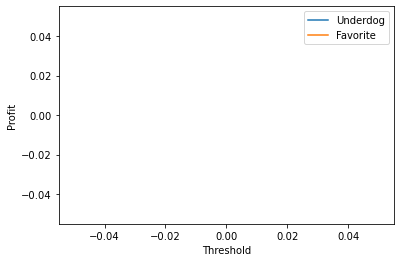

In [174]:
df = pd.read_csv('../nss_capstone/df_rebuild_wager.csv')

variables = ['ML_fav', 'ML_dog']

X = df[variables]
y = df['W/L_dog']

imputer = SimpleImputer(strategy='mean')
imputer.fit(X)

X_imputed = imputer.transform(X)

base_classifier = GradientBoostingClassifier()
calibrated_classifier = CalibratedClassifierCV(base_classifier, method='sigmoid')

# Perform 5-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = cross_val_score(calibrated_classifier, X_imputed, y, cv=kfold)

print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))

predicted_probabilities_class0 = df_prob_val['Class 0 Probability']
predicted_probabilities_class1 = df_prob_val['Class 1 Probability']
closing_moneyline_odds = df[['ML_fav', 'ML_dog']]
percentage_differences_class0 = predicted_probabilities_class0 - closing_moneyline_odds
percentage_differences_class1 = predicted_probabilities_class1 - closing_moneyline_odds
absolute_differences_class0 = abs(percentage_differences_class0)
absolute_differences_class1 = abs(percentage_differences_class1)

# Determine the optimal range of percentage differences for Class 0 (underdog)
thresholds = np.arange(1, 1, 0.01)
profits_class0 = []
profits_class1 = []

for threshold in thresholds:
    selected_bets_class0 = absolute_differences_class0 > threshold
    selected_bets_class1 = absolute_differences_class1 > threshold
    profit_class0 = sum(selected_bets_class0 * df['Payout'] * (selected_bets_class0 * percentage_differences_class0))
    profit_class1 = sum(selected_bets_class1 * df['Payout'] * (selected_bets_class1 * percentage_differences_class1))
    profits_class0.append(profit_class0)
    profits_class1.append(profit_class1)

# Visualize the profits for different thresholds for Class 0 and Class 1
plt.plot(thresholds, profits_class0)
plt.plot(thresholds, profits_class1)
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.legend(['Underdog', 'Favorite'])
plt.show()

In [176]:
df

,Unnamed: 0,game_id,ML_fav,ML_dog,ML_fav_pct,ML_dog_pct,Predict_fav,Predict_dog,W/L_fav,W/L_dog,Payout_fav,Payout_dog
0,1,1,-175.0,155.0,63.64,39.22,0.260766,0.739234,0,1,57.15,155.0
1,2,2,-165.0,145.0,62.26,40.82,0.227410,0.772590,1,0,60.61,145.0
2,3,3,-165.0,145.0,62.26,40.82,0.880105,0.119895,0,1,60.61,145.0
3,4,4,-155.0,135.0,60.78,42.55,0.131634,0.868366,1,0,64.52,135.0
4,5,5,-200.0,175.0,66.67,36.36,0.414052,0.585948,1,0,50.00,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7189,7190,7190,-340.0,280.0,77.27,26.32,0.349101,0.650899,0,1,29.42,280.0
7190,7191,7191,-165.0,145.0,62.26,40.82,0.317118,0.682882,1,0,60.61,145.0
7191,7192,7192,-1750.0,950.0,94.59,9.52,0.413569,0.586431,1,0,5.72,950.0
7192,7193,7193,-290.0,230.0,74.36,30.30,0.195076,0.804924,1,0,34.49,230.0


Cross-validation scores: [0.68908965 0.68144545 0.68269632 0.68714385 0.69557965]
Mean score: 0.6871909820611454


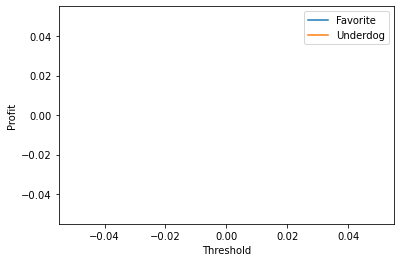

In [181]:
payout = pd.read_csv('../nss_capstone/payout.csv')

variables = ['ML_pct'] #'Close Total', 'Close Spread']

X = payout[variables]
y = payout['W/L_bool']

imputer = SimpleImputer(strategy='mean')
imputer.fit(X)

X_imputed = imputer.transform(X)

base_classifier = GradientBoostingClassifier()
calibrated_classifier = CalibratedClassifierCV(base_classifier, method='sigmoid')

# Perform 5-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = cross_val_score(calibrated_classifier, X_imputed, y, cv=kfold)

print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))

predicted_probabilities_class0 = df_prob_val['Class 0 Probability']
predicted_probabilities_class1 = df_prob_val['Class 1 Probability']
closing_moneyline_odds = payout['ML']
percentage_differences_class0 = predicted_probabilities_class0 - closing_moneyline_odds
percentage_differences_class1 = predicted_probabilities_class1 - closing_moneyline_odds
absolute_differences_class0 = abs(percentage_differences_class0)
absolute_differences_class1 = abs(percentage_differences_class1)

# Determine the optimal range of percentage differences for Class 0 (underdog)
thresholds = np.arange(0, 1, 0.05)
profits_class0 = []

for threshold in thresholds:
    selected_bets_class0 = absolute_differences_class0 > threshold
    profit_class0 = sum(selected_bets_class0 * percentage_differences_class0)
    profits_class0.append(profit_class0)

# Determine the optimal range of percentage differences for Class 1 (favorite)
profits_class1 = []

for threshold in thresholds:
    selected_bets_class1 = absolute_differences_class1 > threshold
    profit_class1 = sum(selected_bets_class1 * percentage_differences_class1)
    profits_class1.append(profit_class1)

# Visualize the profits for different thresholds for Class 0
payout = payout['Payout']
fav_wager = 100  # Assuming a wager amount of $100 on the favorite
dog_wager = 100  # Assuming a wager amount of $100 on the underdog

profitability_fav = []
profitability_dog = []

for threshold in thresholds:
    selected_bets_class0 = absolute_differences_class0 > threshold
    selected_bets_class1 = absolute_differences_class1 > threshold
    profit_fav = sum(selected_bets_class1 * percentage_differences_class1) - (fav_wager * sum(selected_bets_class1))
    profit_dog = sum(selected_bets_class0 * percentage_differences_class0) - (dog_wager * sum(selected_bets_class0))
    profitability_fav.append(profit_fav)
    profitability_dog.append(profit_dog)

# Visualize the profits for different thresholds for Class 0
plt.plot(thresholds, profitability_fav)
plt.plot(thresholds, profitability_dog)
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.legend(['Favorite', 'Underdog'])
plt.show()

In [178]:
payout

,game_id,ML,ML_pct,W/L_bool,Payout
0,1,-175.0,63.64,0,57.15
1,1,155.0,39.22,1,155.0
2,2,-165.0,62.26,1,60.61
3,2,145.0,40.82,0,145.0
4,3,-165.0,62.26,0,60.61
...,...,...,...,...,...
35969,17985,190.0,34.48,0,190.0
35970,17986,-120.0,54.55,0,83.34
35971,17986,100.0,50.0,1,100.0
35972,17987,-1400.0,93.33,1,7.15


In [65]:
# df = pd.read_csv('../nss_capstone/df_rebuild.csv')

# variables = ['ML_pct',
#             'Close Total',
#              'Close Spread']

# X = df[variables]
# y = df['W/L_bool']

# grouped = df.groupby('game_id')
# train_indices, test_indices = [], []
# for _, group_indices in grouped.groups.items():
#     group_train_indices, group_test_indices = train_test_split(group_indices, test_size=0.2, random_state=321)
#     train_indices.extend(group_train_indices)
#     test_indices.extend(group_test_indices)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# imputer = SimpleImputer(strategy='mean')

# imputer.fit(X_train)

# X_train_imputed = imputer.transform(X_train)
# X_test_imputed = imputer.transform(X_test)

# base_classifier = GradientBoostingClassifier()

# calibrated_classifier = CalibratedClassifierCV(base_classifier, method='sigmoid', cv=5) # isotonic/ cv?

# calibrated_classifier.fit(X_train_imputed, y_train)

# probabilities = calibrated_classifier.predict_proba(X_test_imputed)

In [66]:
# df_prob = pd.DataFrame(probabilities, columns=['Class 0 Probability', 'Class 1 Probability'])

In [67]:
# df_prob

,Class 0 Probability,Class 1 Probability
0,0.585905,0.414095
1,0.739234,0.260766
2,0.772590,0.227410
3,0.119895,0.880105
4,0.868366,0.131634
...,...,...
7190,0.650899,0.349101
7191,0.682882,0.317118
7192,0.586431,0.413569
7193,0.804924,0.195076


In [165]:
# payout = pd.read_csv('../nss_capstone/payout.csv').drop(columns = 'Unnamed: 0').fillna('')
# payout.head(4)

,game_id,ML,ML_pct,W/L_bool,Payout
0,1,-175.0,63.64,0,57.15
1,1,155.0,39.22,1,155.0
2,2,-165.0,62.26,1,60.61
3,2,145.0,40.82,0,145.0


In [141]:
# df_rebuild_wager = pd.read_csv('../nss_capstone/df_rebuild.csv').drop(columns = 'Unnamed: 0').fillna('')

In [182]:
# df_rebuild_wager 

In [143]:
df_rebuild_wager = df_rebuild_wager[['game_id','ML','ML_pct','W/L_bool']]

In [144]:
df_rebuild_wager['ML'] = pd.to_numeric(df_rebuild_wager['ML'], errors='coerce')

# Calculate the 'Payout' column
df_rebuild_wager['Payout'] = df_rebuild_wager.groupby('game_id')['ML'].transform(lambda x: (100 / abs(x.iloc[0])) * 100)
df_rebuild_wager.loc[df_rebuild_wager.groupby('game_id').cumcount() > 0, 'Payout'] = np.nan

C:\Users\tjsim\AppData\Local\Temp\ipykernel_46428\3334763452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rebuild_wager['ML'] = pd.to_numeric(df_rebuild_wager['ML'], errors='coerce')
C:\Users\tjsim\AppData\Local\Temp\ipykernel_46428\3334763452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rebuild_wager['Payout'] = df_rebuild_wager.groupby('game_id')['ML'].transform(lambda x: (100 / abs(x.iloc[0])) * 100)


In [145]:
# Replace NaN values in the second row with corresponding payout values
second_row_mask = df_rebuild_wager.groupby('game_id').cumcount() == 1
df_rebuild_wager.loc[second_row_mask, 'Payout'] = df_rebuild_wager.loc[second_row_mask, 'ML'].abs()

In [146]:
df_rebuild_wager['Payout'] = df_rebuild_wager['Payout'].apply(lambda x: math.ceil(x * 100) / 100 if not math.isnan(x) else x)

C:\Users\tjsim\AppData\Local\Temp\ipykernel_46428\561021500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rebuild_wager['Payout'] = df_rebuild_wager['Payout'].apply(lambda x: math.ceil(x * 100) / 100 if not math.isnan(x) else x)


In [147]:
payout = df_rebuild_wager 

In [150]:
#payout.to_csv('../nss_capstone/payout.csv')

In [123]:
df_rebuild_wager['Game'] = (df_rebuild_wager.index // 2) + 1

# Set multi-index by 'Game' and the row number within each game
df_rebuild_wager.set_index(['Game', df_rebuild_wager.groupby('Game').cumcount()], inplace=True)

# Unstack the DataFrame
pivoted_df = df_rebuild_wager.unstack()

# Flatten the column index
pivoted_df.columns = [f'{col}_{num}' for col, num in pivoted_df.columns]

df_rebuild_wager = pd.DataFrame(pivoted_df)

df_rebuild_wager

C:\Users\tjsim\AppData\Local\Temp\ipykernel_46428\4286494612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rebuild_wager['Game'] = (df_rebuild_wager.index // 2) + 1


,game_id_0,game_id_1,ML_0,ML_1,ML_pct_0,ML_pct_1,W/L_bool_0,W/L_bool_1,Payout_0,Payout_1
Game,,,,,,,,,,
1,1,1,-175.0,155.0,63.64,39.22,0,1,57.15,155.0
2,2,2,-165.0,145.0,62.26,40.82,1,0,60.61,145.0
3,3,3,-165.0,145.0,62.26,40.82,0,1,60.61,145.0
4,4,4,-155.0,135.0,60.78,42.55,1,0,64.52,135.0
5,5,5,-200.0,175.0,66.67,36.36,1,0,50.00,175.0
...,...,...,...,...,...,...,...,...,...,...
17983,17983,17983,-125.0,105.0,55.56,48.78,0,1,80.00,105.0
17984,17984,17984,-305.0,255.0,75.31,28.17,1,0,32.79,255.0
17985,17985,17985,-230.0,190.0,69.7,34.48,1,0,43.48,190.0


In [124]:
df_rebuild_wager = pd.merge(df_rebuild_wager, df_prob, how='inner', left_index=True, right_index=True)

In [125]:
df_rebuild_wager

,game_id_0,game_id_1,ML_0,ML_1,ML_pct_0,ML_pct_1,W/L_bool_0,W/L_bool_1,Payout_0,Payout_1,Class 0 Probability,Class 1 Probability
1,1,1,-175.0,155.0,63.64,39.22,0,1,57.15,155.0,0.739234,0.260766
2,2,2,-165.0,145.0,62.26,40.82,1,0,60.61,145.0,0.772590,0.227410
3,3,3,-165.0,145.0,62.26,40.82,0,1,60.61,145.0,0.119895,0.880105
4,4,4,-155.0,135.0,60.78,42.55,1,0,64.52,135.0,0.868366,0.131634
5,5,5,-200.0,175.0,66.67,36.36,1,0,50.00,175.0,0.585948,0.414052
...,...,...,...,...,...,...,...,...,...,...,...,...
7190,7190,7190,-340.0,280.0,77.27,26.32,0,1,29.42,280.0,0.650899,0.349101
7191,7191,7191,-165.0,145.0,62.26,40.82,1,0,60.61,145.0,0.682882,0.317118
7192,7192,7192,-1750.0,950.0,94.59,9.52,1,0,5.72,950.0,0.586431,0.413569
7193,7193,7193,-290.0,230.0,74.36,30.3,1,0,34.49,230.0,0.804924,0.195076


In [126]:
df_rebuild_wager = df_rebuild_wager.rename(columns = {'game_id_1': 'game_id', 'ML_0': 'ML_fav',
                       'ML_1': 'ML_dog', 'ML_pct_0':'ML_fav_pct',
                       'ML_pct_1': 'ML_dog_pct','Class 0 Probability': 'Predict_dog',
                        'Class 1 Probability': 'Predict_fav','Payout_0': 'Payout_fav',
                       'Payout_1': 'Payout_dog', 'W/L_bool_0': 'W/L_fav',
                       'W/L_bool_1':'W/L_dog'})

In [128]:
df_rebuild_wager = df_rebuild_wager[['game_id','ML_fav','ML_dog','ML_fav_pct','ML_dog_pct', 'Predict_fav','Predict_dog',
          'W/L_fav','W/L_dog','Payout_fav','Payout_dog']]

In [129]:
df_rebuild_wager

,game_id,ML_fav,ML_dog,ML_fav_pct,ML_dog_pct,Predict_fav,Predict_dog,W/L_fav,W/L_dog,Payout_fav,Payout_dog
1,1,-175.0,155.0,63.64,39.22,0.260766,0.739234,0,1,57.15,155.0
2,2,-165.0,145.0,62.26,40.82,0.227410,0.772590,1,0,60.61,145.0
3,3,-165.0,145.0,62.26,40.82,0.880105,0.119895,0,1,60.61,145.0
4,4,-155.0,135.0,60.78,42.55,0.131634,0.868366,1,0,64.52,135.0
5,5,-200.0,175.0,66.67,36.36,0.414052,0.585948,1,0,50.00,175.0
...,...,...,...,...,...,...,...,...,...,...,...
7190,7190,-340.0,280.0,77.27,26.32,0.349101,0.650899,0,1,29.42,280.0
7191,7191,-165.0,145.0,62.26,40.82,0.317118,0.682882,1,0,60.61,145.0
7192,7192,-1750.0,950.0,94.59,9.52,0.413569,0.586431,1,0,5.72,950.0
7193,7193,-290.0,230.0,74.36,30.3,0.195076,0.804924,1,0,34.49,230.0


In [130]:
df_rebuild_wager.to_csv('../nss_capstone/df_rebuild_wager.csv')

In [153]:
df = pd.read_csv('../nss_capstone/df_rebuild_wager.csv').drop(columns = 'Unnamed: 0')
df.head(3)

,game_id,ML_fav,ML_dog,ML_fav_pct,ML_dog_pct,Predict_fav,Predict_dog,W/L_fav,W/L_dog,Payout_fav,Payout_dog
0,1,-175.0,155.0,63.64,39.22,0.260766,0.739234,0,1,57.15,155.0
1,2,-165.0,145.0,62.26,40.82,0.227410,0.772590,1,0,60.61,145.0
2,3,-165.0,145.0,62.26,40.82,0.880105,0.119895,0,1,60.61,145.0
